<a href="https://colab.research.google.com/github/theakash07/Machine_learning/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

In [4]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df['area'].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

From here ownwards delving into graphs to find the outliers and to drop it as well from the data set for better Preanalaysis.

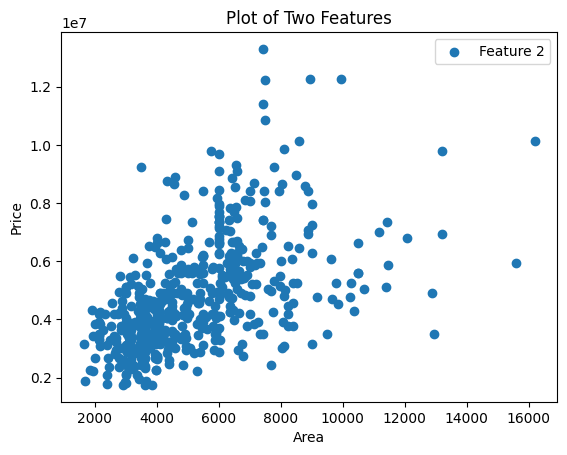

In [9]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Plot of Two Features")
plt.scatter( df['area'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

In [12]:
# prompt: find the areas between 6000 and 8000 whose price is higher

filtered_df = df[(df['area'] >= 7000) & (df['area'] <= 8000) & (df['price'] > 10000000)]
print(filtered_df)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  


In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# prompt: drop row 0 from the dataset
df = df.drop(0)


In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


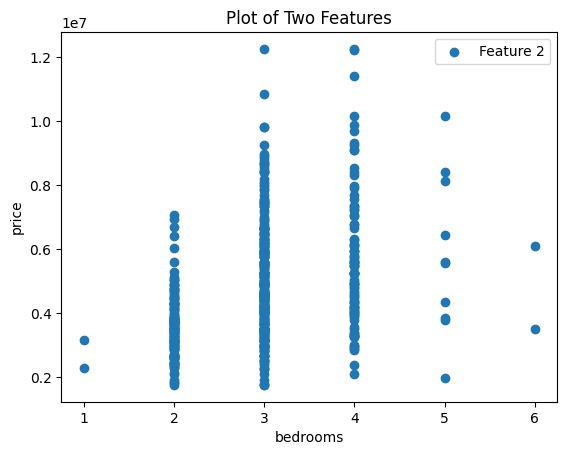

In [19]:
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df['bedrooms'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

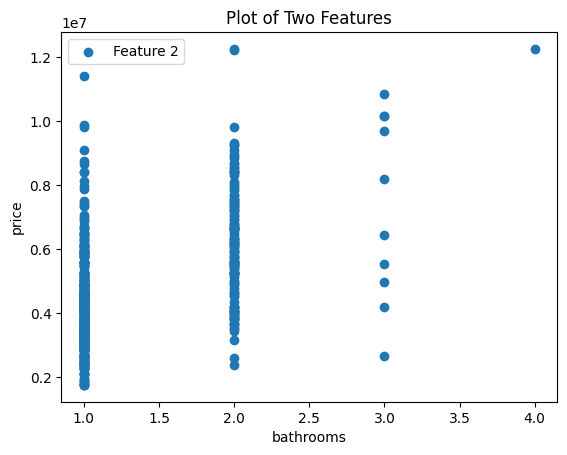

In [20]:
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df['bathrooms'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

In [28]:
findout = df[(df['bathrooms'] == 2) & (df['price'] > 10000000)]
print(findout)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  


In [29]:
# prompt: find the row number whose price is 12250000 and bathrooms == 2

filtered_df = df[(df['price'] == 12250000) & (df['bathrooms'] == 2)]
row_index = filtered_df.index.tolist()[0]
print(row_index)


2


In [34]:
df1 = df.drop(2)

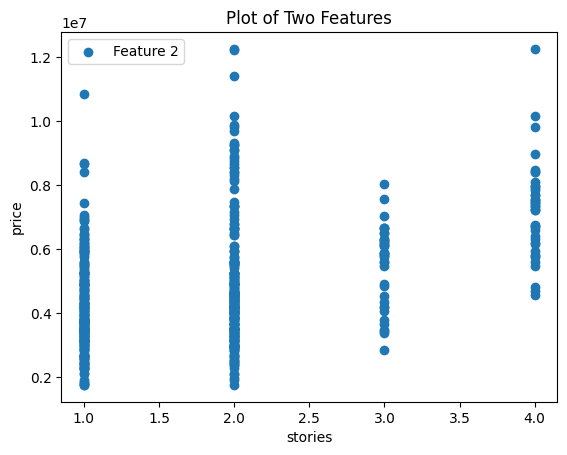

In [31]:
plt.xlabel("stories")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df['stories'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

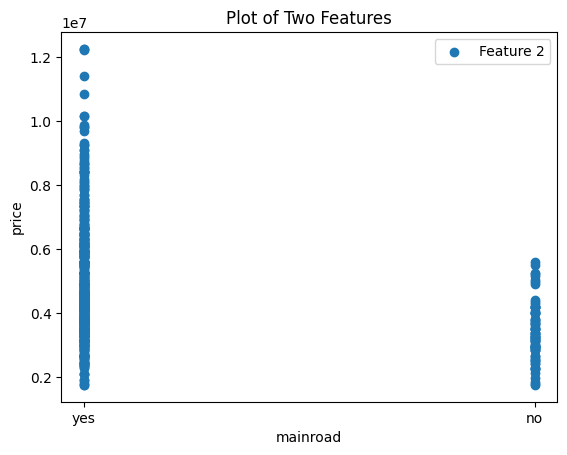

In [32]:
plt.xlabel("mainroad")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df['mainroad'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

In [35]:
df1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


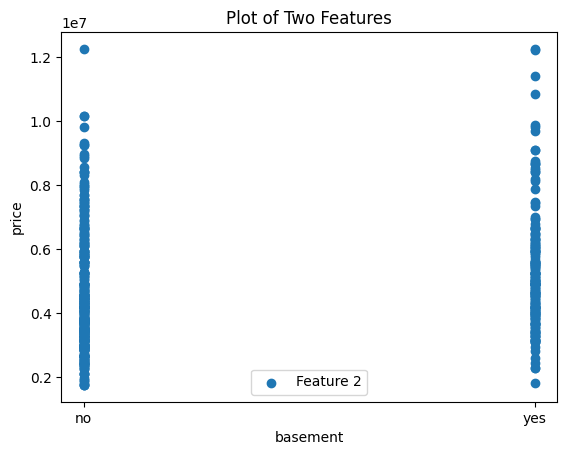

In [39]:
plt.xlabel("basement")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df['basement'],df['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

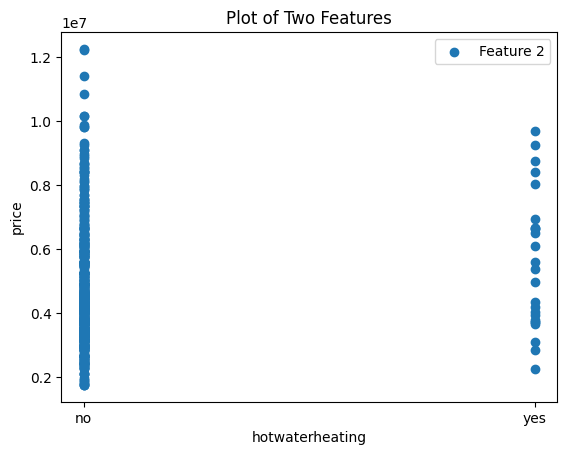

In [52]:
plt.xlabel("hotwaterheating")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df1['hotwaterheating'],df1['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

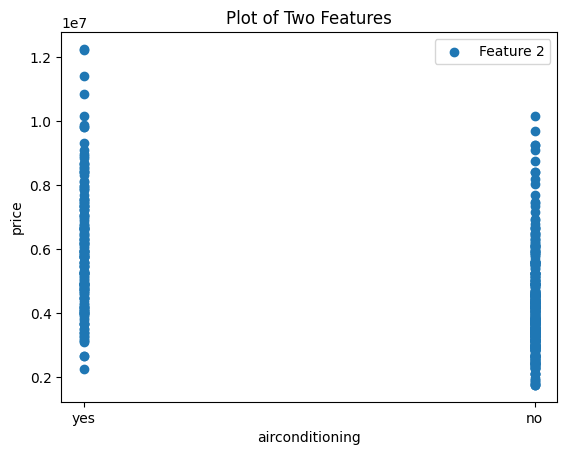

In [51]:
plt.xlabel("airconditioning")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df1['airconditioning'],df1['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

In [50]:
findout1 = df1[(df1['airconditioning']=="no") & (df1['price']>10000000)]
print(findout1)

      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
7  10150000  16200         5          3        2      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
7              no              no        0       no      unfurnished  


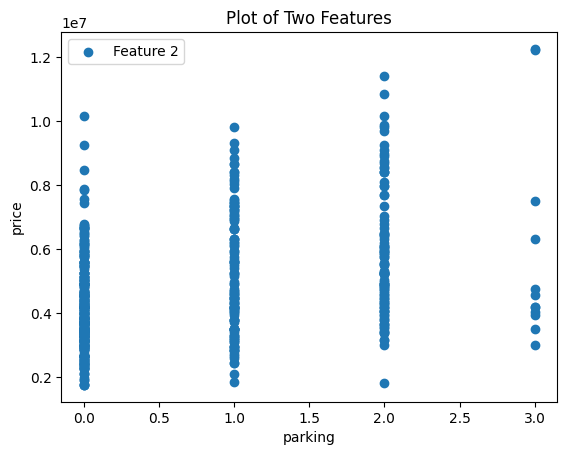

In [48]:

plt.xlabel("parking")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df1['parking'],df1['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

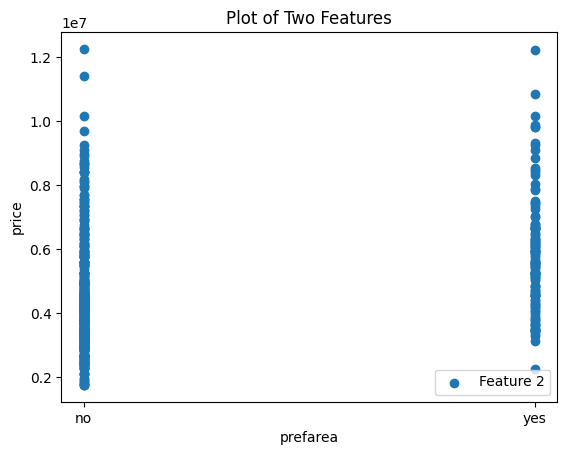

In [53]:

plt.xlabel("prefarea")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df1['prefarea'],df1['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

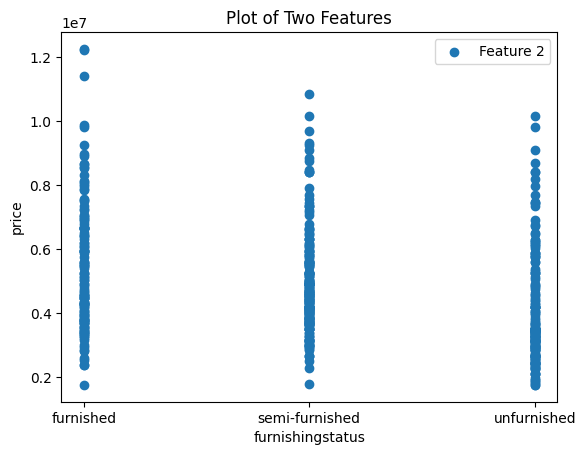

In [54]:
plt.xlabel("furnishingstatus")
plt.ylabel("price")
plt.title("Plot of Two Features")
plt.scatter( df1['furnishingstatus'],df1['price'], label="Feature 2")
plt.legend()

# Show the plot
plt.show()

In [78]:

X = df1.iloc[:, 1:13]  # Select columns from 0 to 9 (excluding 10th column) for features
Y = df1.iloc[:,:1]  # Select the last column for the target variable (price)


In [66]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [79]:
Y

,price
1,12250000
3,12215000
4,11410000
5,10850000
6,10150000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


**TrainTest Split object calling**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [82]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
159,3150,3,2,1,yes,yes,yes,no,yes,0,no,furnished
332,5500,4,1,2,yes,yes,yes,no,no,0,no,semi-furnished
476,5850,3,1,2,yes,no,yes,no,no,1,no,unfurnished
359,3600,3,1,1,yes,no,no,no,no,1,no,unfurnished
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
466,3090,3,1,2,no,no,no,no,no,0,no,semi-furnished
300,4079,3,1,3,yes,no,no,no,no,0,no,semi-furnished
404,4900,3,1,2,no,no,no,no,no,0,no,unfurnished
55,6000,3,1,2,yes,no,no,no,yes,1,no,unfurnished


In [83]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
457,3000,3,1,1,no,no,no,no,yes,0,no,unfurnished
357,6930,4,1,2,no,no,no,no,no,1,no,furnished
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
13,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
219,7000,3,1,2,yes,no,yes,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
146,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
120,6540,3,1,1,yes,yes,yes,no,no,2,yes,furnished
230,5400,2,1,2,yes,no,no,no,no,0,yes,semi-furnished
178,7085,3,1,1,yes,yes,yes,no,no,2,yes,semi-furnished


In [84]:
Y_train

,price
159,5460000
332,3920000
476,2940000
359,3710000
493,2800000
...,...
466,3010000
300,4200000
404,3493000
55,7350000


In [85]:
Y_test

,price
457,3115000
357,3773000
9,9800000
13,9240000
219,4795000
...,...
146,5600000
120,5950000
230,4690000
178,5229000
